In [1]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import *
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import statsmodels.api as sm

In [2]:
# ticker = 'MKTGDPVNA646NWDB' # nominal GDP - FED
ticker = 'RGDPNAVNA666NRUG' # real GDP - FED
data = pd.DataFrame(web.get_data_fred(ticker,
                                      start='1975-01-01',
                                      end='2024-12-01'))

data.rename({ticker: 'VNgdp'}, axis=1, inplace=True)
data['r'] = np.log(data['VNgdp']).diff()*100
data.dropna(axis=0, inplace=True)

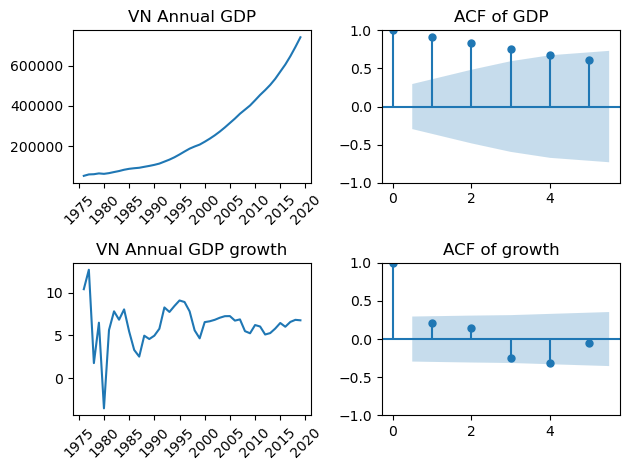

In [3]:
# plotting business

fig, axes = plt.subplots(2,2)
axes[0,0].plot(data.index, data['VNgdp'])
axes[0,0].set_title('VN Annual GDP')

# Apply the formatter to the x-axis
ax = axes[0,0]
ax.tick_params(axis='x', rotation=45)

sm.graphics.tsa.plot_acf(data['VNgdp'], lags=5, ax=axes[0,1], title='ACF of GDP')
axes[1,0].plot(data.index, data['r'])
ax = axes[1,0]
ax.tick_params(axis='x', rotation=45)

axes[1,0].set_title('VN Annual GDP growth')
sm.graphics.tsa.plot_acf(data['r'], lags=5, ax=axes[1,1], title='ACF of growth')
plt.tight_layout()
plt.show()

                            AutoReg Model Results                             
Dep. Variable:                      r   No. Observations:                   44
Model:                     AutoReg(3)   Log Likelihood                 -79.999
Method:               Conditional MLE   S.D. of innovations              1.703
Date:                Mon, 17 Feb 2025   AIC                            169.999
Time:                        23:20:12   BIC                            178.567
Sample:                    01-01-1979   HQIC                           173.119
                         - 01-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7101      1.226      3.841      0.000       2.306       7.114
r.L1           0.3097      0.111      2.779      0.005       0.091       0.528
r.L2           0.2825      0.245      1.152      0.2

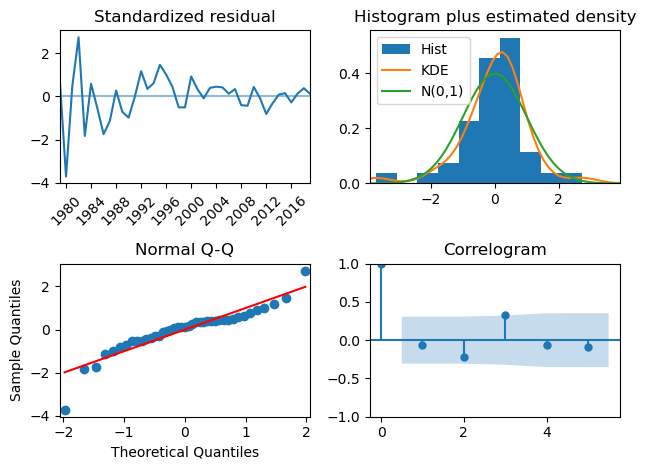

In [4]:
dep = data['r'].asfreq('YS')

T = len(data.index)

# fit AR(3)
modelAR3 = AutoReg(dep, lags=3)
resul_AR3 = modelAR3.fit(cov_type='HAC',
                         cov_kwds={'maxlags': int(0.75*T**(1/3))})

print(resul_AR3.summary())

fig_diag = resul_AR3.plot_diagnostics(lags=5)
axes = fig_diag.get_axes()
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-ticks for the top-left subplot
plt.tight_layout()
plt.show()